In [ ]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import plotly.express as px

# EDA

In [ ]:
df = pd.read_csv('/content/HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.rename(columns={'Unnamed: 0': 'X'}, inplace=True)
df.head()

,X,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         615 non-null    int64  
 1   Category  615 non-null    object 
 2   Age       615 non-null    int64  
 3   Sex       615 non-null    object 
 4   ALB       614 non-null    float64
 5   ALP       597 non-null    float64
 6   ALT       614 non-null    float64
 7   AST       615 non-null    float64
 8   BIL       615 non-null    float64
 9   CHE       615 non-null    float64
 10  CHOL      605 non-null    float64
 11  CREA      615 non-null    float64
 12  GGT       615 non-null    float64
 13  PROT      614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


## Data Cleaning

In [ ]:
#cek nilai null dalam setiap kolom di data set
print(df.isnull().sum())

X            0
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


In [ ]:
#mengisi nilai null dengan mean dari kolom
mean_value = df['ALB'].mean()
df['ALB'].fillna(mean_value, inplace=True)

mean_value = df['ALP'].mean()
df['ALP'].fillna(mean_value, inplace=True)

mean_value = df['ALT'].mean()
df['ALT'].fillna(mean_value, inplace=True)

mean_value = df['CHOL'].mean()
df['CHOL'].fillna(mean_value, inplace=True)

mean_value = df['PROT'].mean()
df['PROT'].fillna(mean_value, inplace=True)

print(df.isnull().sum())

X           0
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [ ]:
#cek duplikasi data
print(df.duplicated().sum())

0


## Data Visualization

In [ ]:
df.describe()

,X,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
# Statistik deskriptif untuk setiap kolom
print(df.describe())

# Perhitungan mean untuk setiap kolom
print(df.mean())

# Perhitungan median untuk setiap kolom
print(df.median())

# Perhitungan modus untuk setiap kolom
print(df.mode())

# Perhitungan persentil untuk setiap kolom
print(df.quantile([0.25, 0.50, 0.75]))

                X         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.775920   25.643955   25.448940   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.950000   16.400000   21.600000   
50%    308.000000   47.000000   41.900000   66.700000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   79.300000   33.050000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  615.000000   615.000000  615.000000  615.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.2056

<ipython-input-8-42f830788a6b>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
<ipython-input-8-42f830788a6b>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())
<ipython-input-8-42f830788a6b>:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.quantile([0.25, 0.50, 0.75]))


In [ ]:
#Histogram Distribusi 'Category'
fig = px.bar(
    df.Category.value_counts(),
    color_discrete_sequence=['darkblue'],
    title='Distribusi dari Kolom Category',
)
fig.update_layout(
    xaxis_title = "Category",
    yaxis_title = "Frekuensi",
    title_x = 0.5,
    showlegend = False
)
fig.show()

In [ ]:
#Histogram Distribusi 'Age'
age_counts = df.Age.value_counts()
fig = px.bar(age_counts, title="Age")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frekuensi",
    title_x = 0.5,
    showlegend = False
)
fig.show()

In [ ]:
#Diagram pie 'Sex'
df.Sex.value_counts()
px.pie(df,names='Sex',title='Gender Overview',hole=0.8)

<ipython-input-12-8309ffba0e9d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



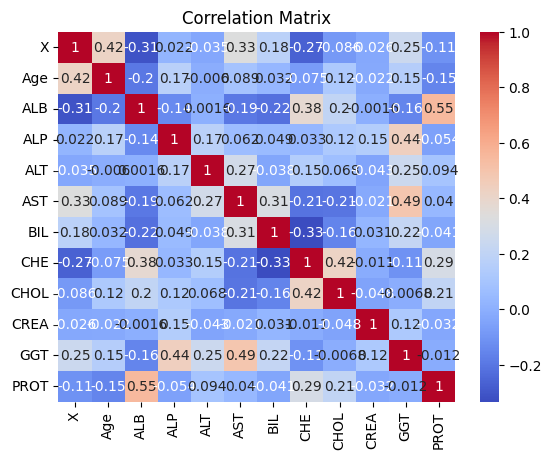

In [ ]:
# Korelasi Pearson antara variabel numerik
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

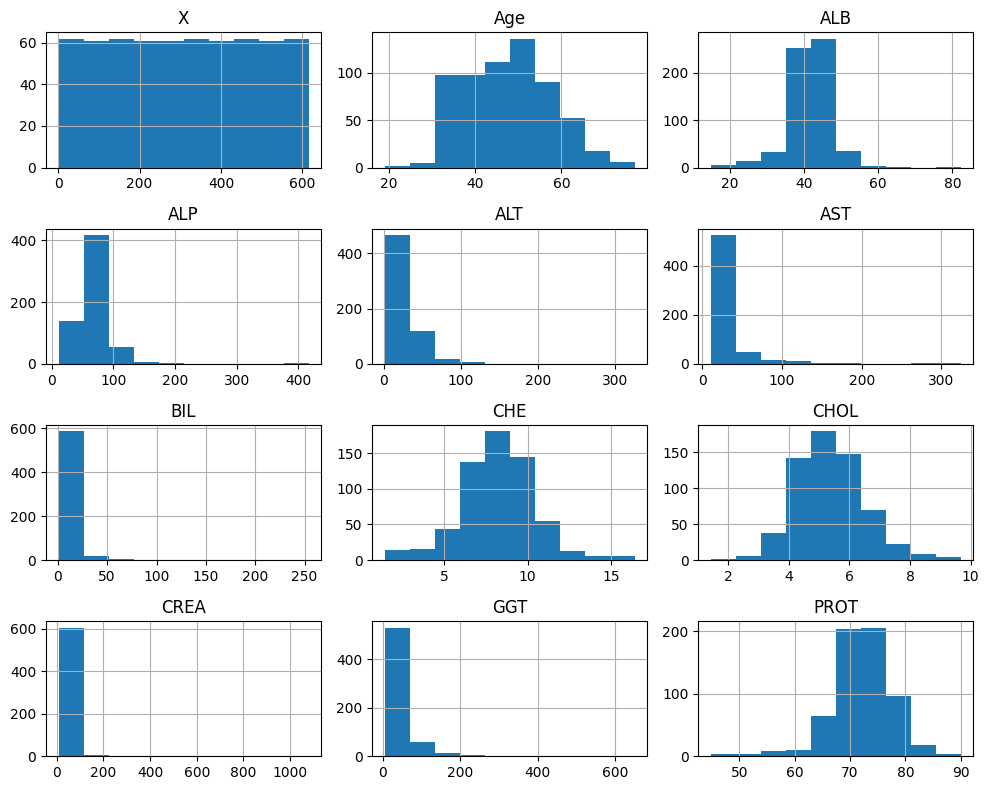

In [ ]:
# Histogram untuk setiap kolom numerik
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

## Data Transformation

In [ ]:
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

label encoding

In [ ]:
#memformat kolom Category
df['Category'] = df['Category'].str.split('=').str[1]
df['Category'] = df['Category'].str.split('s').str[0]

In [ ]:
#label encoding kolom kategorikal (Category dan Sex)
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [ ]:
df.head()

,X,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,1,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,1,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,1,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,1,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
X = df.drop('Category', axis=1)
y = df['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Inisialisasi model Naive Bayes
model1 = GaussianNB()

start_time = time.time()
# Latih model Naive Bayes
model1.fit(X_train, y_train)

end_time = time.time()

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.96      1.00      0.98        96
           2       0.88      0.78      0.82         9
           3       0.71      0.83      0.77         6
           4       0.83      0.56      0.67         9

    accuracy                           0.93       123
   macro avg       0.88      0.77      0.81       123
weighted avg       0.93      0.93      0.93       123



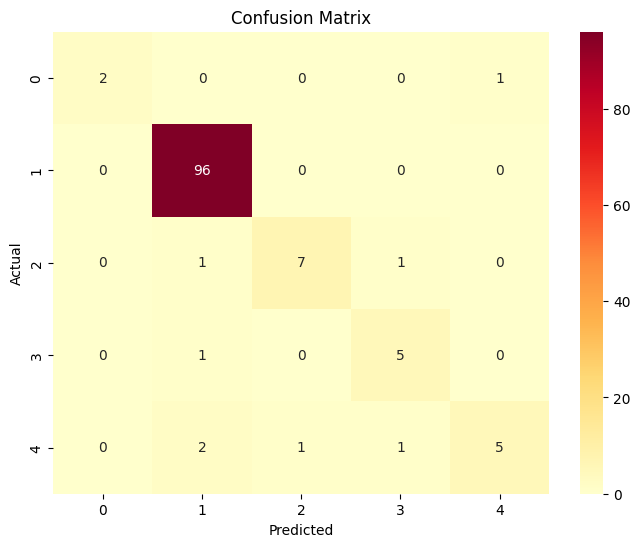

In [ ]:
y_pred = model1.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

training_time = end_time - start_time

print("Waktu pelatihan:", training_time, "detik")

Accuracy: 0.9349593495934959
Waktu pelatihan: 0.007683515548706055 detik


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Inisialisasi model Random Forest
model2 = RandomForestClassifier()

start_time = time.time()
# Latih model Random Forest
model2.fit(X_train, y_train)

end_time = time.time()

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.99      1.00      0.99        96
           2       1.00      0.78      0.88         9
           3       0.67      1.00      0.80         6
           4       0.89      0.89      0.89         9

    accuracy                           0.96       123
   macro avg       0.91      0.80      0.81       123
weighted avg       0.97      0.96      0.96       123



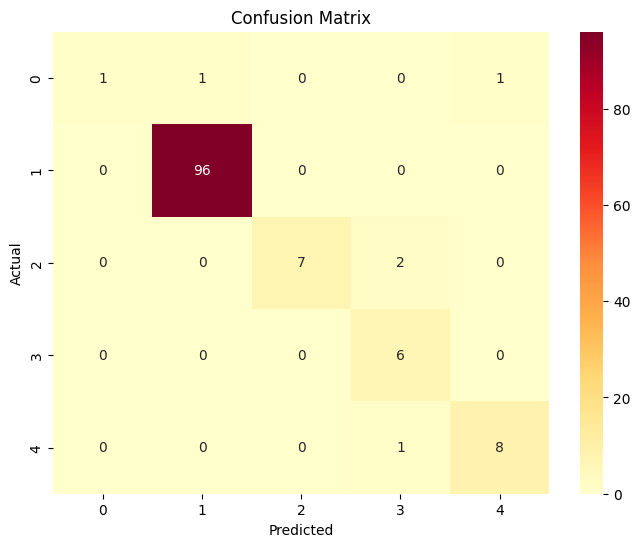

In [ ]:
y_pred = model2.predict(X_test)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

training_time = end_time - start_time

print("Waktu pelatihan:", training_time, "detik")

Accuracy: 0.959349593495935
Waktu pelatihan: 0.22917580604553223 detik


# XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier(n_estimators= 200 ,max_depth= 165)

#latih model
start_time = time.time()
model.fit(X_train, y_train)

end_time = time.time()

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.99      1.00      0.99        96
           2       1.00      1.00      1.00         9
           3       0.86      1.00      0.92         6
           4       1.00      0.89      0.94         9

    accuracy                           0.98       123
   macro avg       0.97      0.91      0.93       123
weighted avg       0.98      0.98      0.98       123



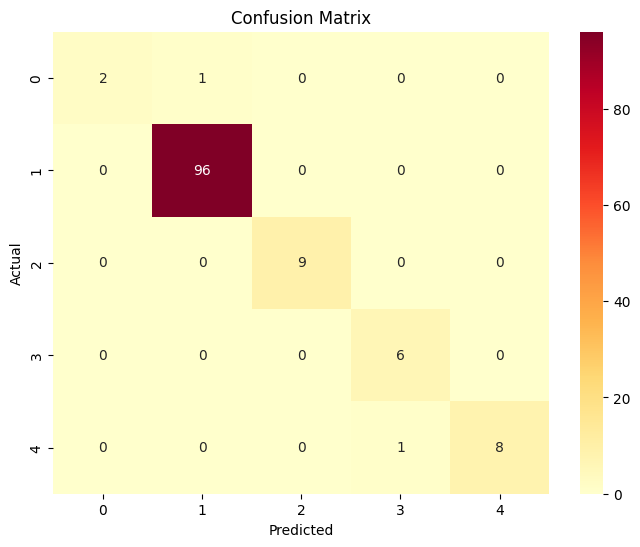

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

training_time = end_time - start_time

print("Waktu pelatihan:", training_time, "detik")

Accuracy: 0.983739837398374
Waktu pelatihan: 0.20133280754089355 detik


Total Data yang digunakan: 615

Data Latih: 80%

Data Uji: 20%

1.  Naive Bayes
>*   Akurasi: 0.9349593495934959
>*   Waktu pelatihan: 0.007683515548706055 detik

2.   Random Forest
>* Akurasi: 0.959349593495935
>* Waktu pelatihan: 0.22917580604553223 detik

3.   XGBOOST
>* Akurasi: 0.983739837398374
>* Waktu pelatihan: 0.20133280754089355 detik

Jadi, algoritma yang paling bagus dipakai untuk dataset ini adalah XGBoost dengan akurasi paling tinggi dan waktu pelatihan yang sebentar, selama 0.2 detik.
